In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Medical_insurance_dataset.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased
5,15728773,Male,27,58000,not-purchased
6,15598044,Female,27,84000,not-purchased
7,15694829,Female,32,150000,purchased
8,15600575,Male,25,33000,not-purchased
9,15727311,Female,35,65000,not-purchased


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df["Purchased"] = df["Purchased"].apply(lambda x: 1 if x == "purchased" else 0)
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


### Exploratory Data Analysis

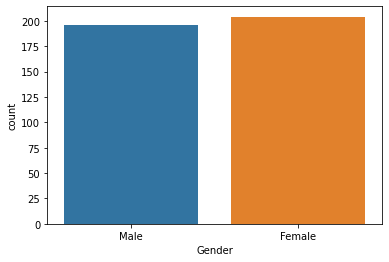

In [5]:
sns.countplot(x="Gender", data=df)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

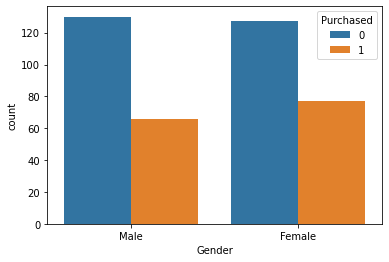

In [6]:
sns.countplot(x="Gender", hue="Purchased", data=df)

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

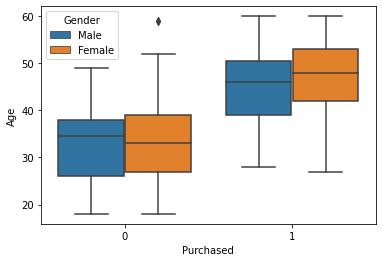

In [7]:
sns.boxplot(x="Purchased", y="Age", hue="Gender", data=df)

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

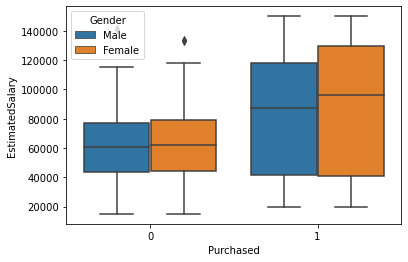

In [8]:
sns.boxplot(x="Purchased", y="EstimatedSalary", hue="Gender", data=df)

### Data Preprocessing

In [9]:
from  sklearn import metrics
from sklearn.model_selection import train_test_split

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
X = df.drop(["Purchased"], axis="columns")
y = df["Purchased"]

In [12]:
X = pd.get_dummies(X)


* split data into training and testing set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

* Training the model

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [16]:
logistic_prediction = logistic_model.predict(X_test)
logistic_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

* Model Evaluation

In [17]:
def confusion_matrix(ytest, ypred, label=["Negative", "positive"]):
    "A beautiful  confusion matrix to check the model performance"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize =(7,5))
    sns.heatmap(cm, annot=True, cbar=False, fmt="d", cmap="YlGnBu")
    plt.xlabel("Predicted", fontsize=13)
    plt.xticks([0.5,1.5], label)
    plt.ylabel("Truth", fontsize=13)
    plt.yticks([0.5,1.5], label)
    plt.title("A Confusion Matrix")
    plt.show();

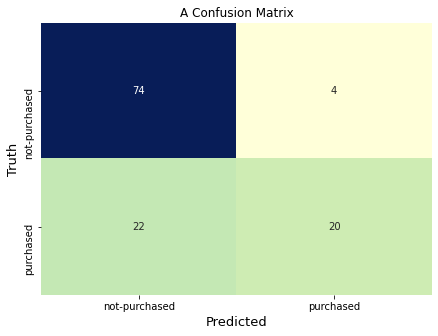

In [18]:
confusion_matrix(y_test, logistic_prediction, label=[ "not-purchased", "purchased"])

In [19]:
metrics.accuracy_score(y_test, logistic_prediction)

0.7833333333333333

In [20]:
metrics.f1_score(y_test, logistic_prediction)

0.6060606060606061

In [21]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

GaussianNB()

In [22]:
naive_prediction = naive_model.predict(X_test)
naive_prediction

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

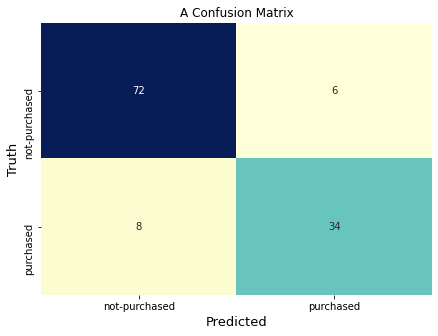

In [23]:
confusion_matrix(y_test, naive_prediction, label=[ "not-purchased", "purchased"])

In [24]:
metrics.accuracy_score(y_test, naive_prediction)

0.8833333333333333

In [25]:
metrics.f1_score(y_test, naive_prediction)

0.8292682926829269

In [26]:
from sklearn.ensemble import RandomForestClassifier
randomForest_model = RandomForestClassifier()
randomForest_model.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
randomForest_prediction = randomForest_model.predict(X_test)
randomForest_prediction 

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

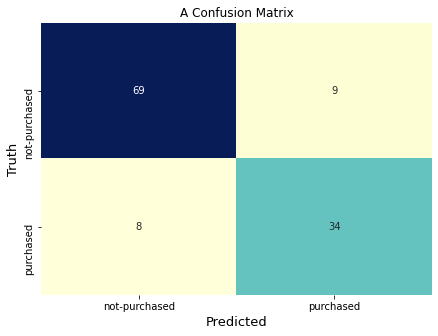

In [28]:
confusion_matrix(y_test, randomForest_prediction, label=["not-purchased", "purchased"])

In [29]:
metrics.accuracy_score(y_test, randomForest_prediction)

0.8583333333333333

In [30]:
metrics.f1_score(y_test, randomForest_prediction)

0.8

In [31]:
# pip install xgboost

In [66]:
from xgboost import XGBClassifier
param_dist = {'objective':'binary:logistic', 'n_estimators':2}

xgboost_model = XGBClassifier(**param_dist)
xgboost_model= xgboost_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='logloss',
        verbose=True)
evals_result = xgboost_model.evals_result()

[0]	validation_0-logloss:0.50631	validation_1-logloss:0.53560
[1]	validation_0-logloss:0.39498	validation_1-logloss:0.43800


In [69]:
xgb_prediction = xgboost_model.predict(X_test)
xgb_prediction

/Users/jayne/opt/anaconda3/envs/my-env/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [70]:
metrics.accuracy_score(y_test, xgb_prediction)

0.8833333333333333

In [71]:
metrics.f1_score(y_test, xgb_prediction)

0.8372093023255814

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
dt_prediction = dt_model.predict(X_test)

In [35]:
metrics.accuracy_score(y_test, dt_prediction)

0.8916666666666667

In [36]:
metrics.f1_score(y_test, dt_prediction)

0.8505747126436781

In [37]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
kn_prediction = kn_model.predict(X_test)

In [39]:
metrics.accuracy_score(y_test, kn_prediction)

0.7416666666666667

In [40]:
metrics.f1_score(y_test, kn_prediction)

0.5866666666666667

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [42]:
gb_prediction = gb_model.predict(X_test)

In [43]:
metrics.f1_score(y_test, gb_prediction)

0.8

In [44]:
metrics.accuracy_score(y_test, gb_prediction)

0.8583333333333333

In [45]:
# pip install lightgbm


In [52]:
from lightgbm import LGBMClassifier
light_model = LGBMClassifier()
light_model.fit(X_train, y_train)

LGBMClassifier()

In [53]:
light_prediction = light_model.predict(X_test)
light_prediction


array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [54]:
metrics.accuracy_score(y_test, light_prediction)

0.8916666666666667

In [55]:
metrics.f1_score(y_test, light_prediction)

0.8433734939759037

In [ ]:
pip install --no-binary :all: lightgbm